In [41]:
from pygbif import species
from pygbif import occurrences
import copy

In [48]:
def plot_species_occurrence(name_species): 
    usageKey = species.name_backbone(name=name_species, verbose=False)['usageKey']
    
    first_res = occurrences.search(taxonKey=usageKey, limit=100000)
    full_results = copy.copy(first_res)

    # results are paginated so we need a loop to fetch them all
    counter = 1
    while first_res['endOfRecords'] is False:
        first_res = occurrences.search(taxonKey=usageKey, offset=300*counter, limit=10000)
        full_results['results'] = copy.copy(full_results['results']) + copy.copy(first_res['results'])
        counter+=1

    print(full_results['count'], len(full_results['results'])) # match?

    df_full = pd.DataFrame(full_results['results']) # load results in pandas dataframes

    # latitude/longitude lists
    df_full_latitude = df_full.decimalLatitude
    df_full_longitude = df_full.decimalLongitude

    # changed projection from 'ortho' to 'robin' to 'merc' finally
    # Make this plot larger.
    plt.figure(figsize=(16,12))

    plt.title("%s occurence records from GBIF" % name_species )

    # "+5" in the corner points is on purpose, to zoom out a bit
    my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0, 
                     llcrnrlon=df_full_longitude.min()-5, # lower left corner longitude point 
                     llcrnrlat=df_full_latitude.min()-5,  # lower left corner latitude point
                     urcrnrlon=df_full_longitude.max()+5, # upper right longitude point
                     urcrnrlat=df_full_latitude.max()+5 # upper right latitude point
                    )  

    df_x, df_y = my_map(df_full_longitude.tolist(), df_full_latitude.tolist())

    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.drawmapboundary(fill_color='#649eff')
    my_map.fillcontinents(color='#cc9955')
    # draw latitude and longitude
    my_map.drawmeridians(np.arange(0, 360, 30))
    my_map.drawparallels(np.arange(-90, 90, 30))

    my_map.plot(df_x, df_y, 'bo', markersize=5, color="#b01a1a")
    plt.show()

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [50]:
import pandas as pd

In [51]:
import time

24 24


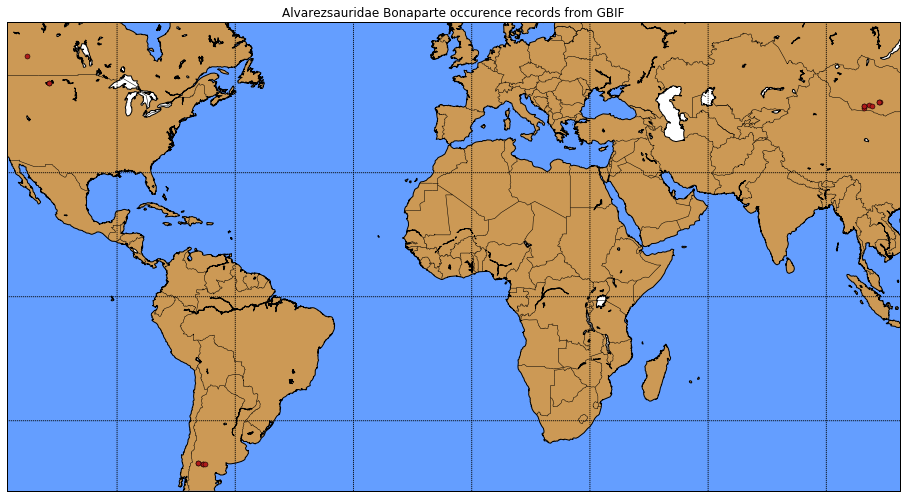

Elapsed time: 2.0383107662200928 ms


In [52]:
start = time.time()
plot_species_occurrence("Alvarezsauridae Bonaparte") 
stop = time.time()
print("Elapsed time: %s ms" % (stop-start))

In [ ]:
start = time.time()
plot_species_occurrence("Urocolius Bonaparte") 
stop = time.time()
print("Elapsed time: %s ms" % (stop-start))